In [1]:
import tensorflow as tf
from  tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
f_data =keras.datasets.fashion_mnist

In [4]:
(train_i,train_l),(test_i,test_l)=f_data.load_data()

In [5]:
train_i.shape

(60000, 28, 28)

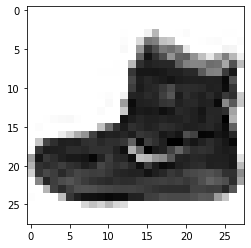

9


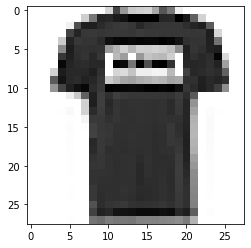

0


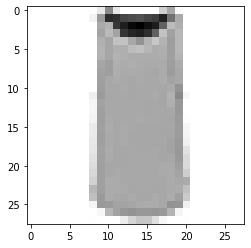

0


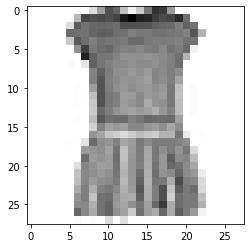

3


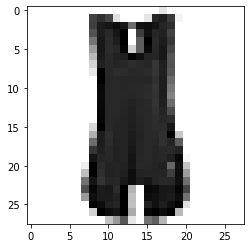

0


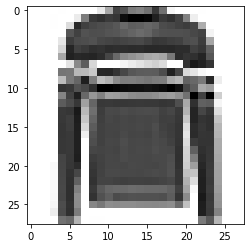

2


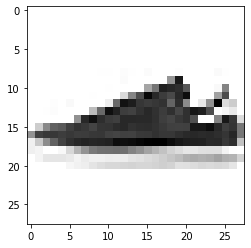

7


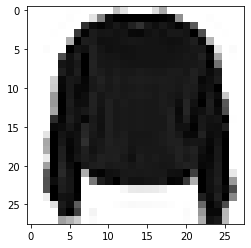

2


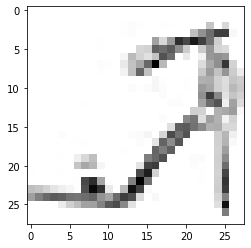

5


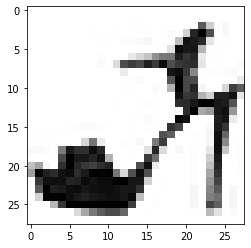

5


In [15]:
#输出0-9图及标签
for i in range(10):
    plt.imshow(train_i[i],cmap="binary")
    plt.show()
    print(train_l[i])

In [58]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [59]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               100480    
                                                                 
 dense_34 (Dense)            (None, 128)               16512     
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 dense_36 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [61]:
his=model.fit(train_i,train_l,epochs=100,batch_size=128,validation_split=0.3)

Epoch 1/100
329/329 [==============================] - 1s 3ms/step - loss: 2.6833 - accuracy: 0.7260 - val_loss: 0.9197 - val_accuracy: 0.7501
Epoch 2/100
329/329 [==============================] - 1s 3ms/step - loss: 0.6722 - accuracy: 0.7966 - val_loss: 0.7509 - val_accuracy: 0.7763
Epoch 3/100
329/329 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.8224 - val_loss: 0.5705 - val_accuracy: 0.8159
Epoch 4/100
329/329 [==============================] - 1s 3ms/step - loss: 0.4570 - accuracy: 0.8405 - val_loss: 0.5208 - val_accuracy: 0.8282
Epoch 5/100
329/329 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.8495 - val_loss: 0.5055 - val_accuracy: 0.8332
Epoch 6/100
329/329 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.8578 - val_loss: 0.5058 - val_accuracy: 0.8263
Epoch 7/100
329/329 [==============================] - 1s 3ms/step - loss: 0.3718 - accuracy: 0.8670 - val_loss: 0.5292 - val_accuracy: 0.8293

Epoch 58/100
329/329 [==============================] - 1s 3ms/step - loss: 0.1672 - accuracy: 0.9375 - val_loss: 0.4743 - val_accuracy: 0.8800
Epoch 59/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1635 - accuracy: 0.9388 - val_loss: 0.4467 - val_accuracy: 0.8800
Epoch 60/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1663 - accuracy: 0.9385 - val_loss: 0.4794 - val_accuracy: 0.8831
Epoch 61/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1716 - accuracy: 0.9371 - val_loss: 0.4728 - val_accuracy: 0.8798
Epoch 62/100
329/329 [==============================] - 1s 3ms/step - loss: 0.1650 - accuracy: 0.9378 - val_loss: 0.4722 - val_accuracy: 0.8789
Epoch 63/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1685 - accuracy: 0.9387 - val_loss: 0.4755 - val_accuracy: 0.8796
Epoch 64/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1651 - accuracy: 0.9388 - val_loss: 0.4819 - val_accuracy:

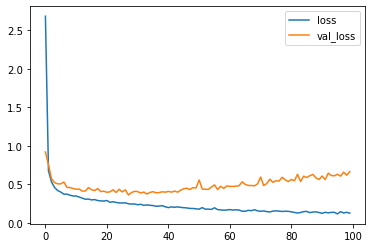

In [62]:
plt.plot(his.history.get("loss"),label="loss")
plt.plot(his.history.get("val_loss"),label="val_loss")
plt.legend()

In [63]:
#上图可见，随训练次数的增加，训练集的loss在减少，但验证集的loss反而再增加。过拟合。验证集上的表现体现了模型的泛化性能

In [64]:
#下图精度的变化

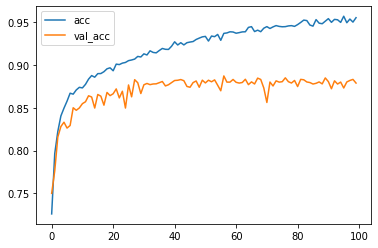

In [65]:
plt.plot(his.history.get("accuracy"),label="acc")
plt.plot(his.history.get("val_accuracy"),label="val_acc")
plt.legend()

In [66]:
test_loss,test_acc=model.evaluate(test_i,test_l)

313/313 [==============================] - 0s 974us/step - loss: 0.7242 - accuracy: 0.8714


In [67]:
np.argmax(model.predict([test_i[2:4]]),axis=1)  #模型预测的结果是该图像所属不同类别的概率，属于哪个类别的概率大就属于哪个类别（np.argmax）

array([1, 1], dtype=int64)

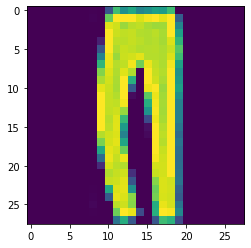

In [68]:
plt.imshow(test_i[2])

In [69]:
print(test_l[2])

1
